# **Import Libraries**

In [281]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset and viewing the Dataset**

In [282]:

Urban_Heat_Island_data = pd.read_csv('Census_UHI_US_Urbanized_recalculated.csv')
Urban_Heat_Island_data.head()

,system:index,Area,Census_geoid,DEM_rur,DEM_urb_CT,DEM_urb_CT_act,DEM_urb_all,LST_rur_day,LST_rur_day_summer,LST_rur_day_winter,...,DelDEM,UHI_annual_day_city,UHI_annual_night_city,UHI_summer_day_city,UHI_summer_night_city,UHI_winter_day_city,UHI_winter_night_city,DelNDVI_annual_city,DelNDVI_summer_city,DelNDVI_winter_city
0,132,3612190.349,48441011400,535.737915,531.324716,531.324716,533.824827,32.359762,41.321518,21.427654,...,-4.413199,0.407165,0.245388,0.447746,0.281339,0.230182,0.086941,-0.013958,-0.009318,-0.017621
1,133,7995814.932,48441012200,535.737915,529.480255,532.295095,533.824827,32.359762,41.321518,21.427654,...,-6.257659,0.407165,0.245388,0.447746,0.281339,0.230182,0.086941,-0.013958,-0.009318,-0.017621
2,134,1301622.240,48441012100,535.737915,531.754935,531.754935,533.824827,32.359762,41.321518,21.427654,...,-3.982980,0.407165,0.245388,0.447746,0.281339,0.230182,0.086941,-0.013958,-0.009318,-0.017621
3,135,1827807.087,48441011900,535.737915,529.951974,529.951974,533.824827,32.359762,41.321518,21.427654,...,-5.785941,0.407165,0.245388,0.447746,0.281339,0.230182,0.086941,-0.013958,-0.009318,-0.017621
4,323,2746963.892,48441012300,535.737915,538.214401,538.214401,533.824827,32.359762,41.321518,21.427654,...,2.476486,0.407165,0.245388,0.447746,0.281339,0.230182,0.086941,-0.013958,-0.009318,-0.017621


In [283]:
Urban_Heat_Island_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55871 entries, 0 to 55870
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   system:index                 55871 non-null  object 
 1   Area                         55871 non-null  float64
 2   Census_geoid                 55871 non-null  int64  
 3   DEM_rur                      55871 non-null  float64
 4   DEM_urb_CT                   55854 non-null  float64
 5   DEM_urb_CT_act               55871 non-null  float64
 6   DEM_urb_all                  55871 non-null  float64
 7   LST_rur_day                  55871 non-null  float64
 8   LST_rur_day_summer           55871 non-null  float64
 9   LST_rur_day_winter           55871 non-null  float64
 10  LST_rur_night                55871 non-null  float64
 11  LST_rur_night_summer         55871 non-null  float64
 12  LST_rur_night_winter         55871 non-null  float64
 13  LST_urb_day_CT  

# ***Missing Value Checking***

In [284]:
print("Missing values:\n", Urban_Heat_Island_data.isnull().sum())

Missing values:
 system:index              0
Area                      0
Census_geoid              0
DEM_rur                   0
DEM_urb_CT               17
                         ..
UHI_winter_day_city       0
UHI_winter_night_city     0
DelNDVI_annual_city       0
DelNDVI_summer_city       0
DelNDVI_winter_city       0
Length: 67, dtype: int64


In [285]:
missing_counts = Urban_Heat_Island_data.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

Missing values per column:
 DEM_urb_CT                      17
LST_urb_day_CT                 222
LST_urb_day_CT_act             194
LST_urb_day_CT_act_summer      194
LST_urb_day_CT_act_winter      194
LST_urb_day_CT_summer          222
LST_urb_day_CT_winter          222
LST_urb_night_CT               222
LST_urb_night_CT_act           194
LST_urb_night_CT_act_summer    194
LST_urb_night_CT_act_winter    194
LST_urb_night_CT_summer        222
LST_urb_night_CT_winter        222
NDVI_urb_CT                     18
NDVI_urb_CT_summer              18
NDVI_urb_CT_winter              18
UHI_annual_day                 222
UHI_annual_night               222
UHI_summer_day                 222
UHI_summer_night               222
UHI_winter_day                 222
UHI_winter_night               222
DelNDVI_annual                  18
DelNDVI_summer                  18
DelNDVI_winter                  18
DelDEM                          17
dtype: int64


## **Missing Value Handling**

In [286]:

for col in Urban_Heat_Island_data.columns:
    if Urban_Heat_Island_data[col].isnull().sum() > 0:
        if Urban_Heat_Island_data[col].dtype == 'object':
            # For categorical/text columns → replace with mode
            mode_val = Urban_Heat_Island_data[col].mode()[0]
            Urban_Heat_Island_data[col].fillna(mode_val, inplace=True)
        else:
            # For numerical columns → replace with mean or median
            median_val = Urban_Heat_Island_data[col].median()
            Urban_Heat_Island_data[col].fillna(median_val, inplace=True)

# **Dataset after Missing Value Checking**

In [287]:
print("Missing values:\n", Urban_Heat_Island_data.isnull().sum())

Missing values:
 system:index             0
Area                     0
Census_geoid             0
DEM_rur                  0
DEM_urb_CT               0
                        ..
UHI_winter_day_city      0
UHI_winter_night_city    0
DelNDVI_annual_city      0
DelNDVI_summer_city      0
DelNDVI_winter_city      0
Length: 67, dtype: int64


# **Exploratory Data Analysis**

## **Descriptive Statistics**

In [288]:

Urban_Heat_Island_data.describe()

,Area,Census_geoid,DEM_rur,DEM_urb_CT,DEM_urb_CT_act,DEM_urb_all,LST_rur_day,LST_rur_day_summer,LST_rur_day_winter,LST_rur_night,...,DelDEM,UHI_annual_day_city,UHI_annual_night_city,UHI_summer_day_city,UHI_summer_night_city,UHI_winter_day_city,UHI_winter_night_city,DelNDVI_annual_city,DelNDVI_summer_city,DelNDVI_winter_city
count,5.587100e+04,5.587100e+04,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,...,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000
mean,1.932836e+07,2.777785e+10,240.469212,213.356576,216.733977,223.150372,24.627393,34.108306,11.876150,8.949347,...,-27.091172,0.875346,0.251233,1.183138,0.381184,0.602524,0.195495,-0.039066,-0.049968,-0.028470
std,1.363224e+08,1.675855e+10,307.299768,312.869781,318.566887,306.915491,6.107043,5.942030,9.062126,4.802674,...,66.431103,0.516426,0.158923,0.657563,0.174723,0.462990,0.216425,0.026095,0.029301,0.029980
min,8.285471e+03,1.001020e+09,-8.807052,-43.485750,-41.432002,-8.029749,1.163192,21.809145,-20.009604,-8.281791,...,-308.376771,-0.830654,-0.508663,-1.214343,-0.071244,-0.505421,-1.116967,-0.133218,-0.125079,-0.136237
25%,1.408244e+06,1.208601e+10,89.205794,32.086110,31.896961,60.295000,19.358336,29.923387,5.056692,5.225728,...,-49.895826,0.549820,0.130246,0.732822,0.242174,0.349136,0.056846,-0.052222,-0.064355,-0.035771
50%,3.114967e+06,2.700305e+10,179.949384,141.148343,144.267429,162.608685,22.779711,32.007416,9.584410,7.555938,...,-12.491392,0.777465,0.209877,1.142610,0.357094,0.490664,0.188119,-0.037992,-0.047825,-0.023172
75%,9.037901e+06,4.105101e+10,276.765739,252.231730,255.179515,249.939736,29.786117,36.137233,19.739607,12.495096,...,3.344861,1.141391,0.366575,1.714405,0.545850,0.692755,0.351530,-0.021593,-0.031128,-0.008010
max,1.340000e+10,7.215375e+10,2109.512280,2312.714286,2851.654872,2110.242762,41.505671,54.313594,30.526708,21.840678,...,792.443443,2.493571,0.880243,3.273696,0.986969,2.115459,0.804509,0.078626,0.074493,0.087600


## **Distribution of Target Variable**

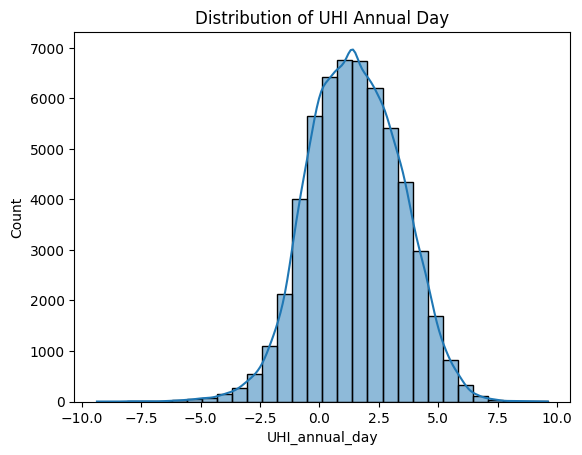

In [289]:

sns.histplot(Urban_Heat_Island_data['UHI_annual_day'], kde=True, bins=30)
plt.title('Distribution of UHI Annual Day')
plt.show()

## **Correlation Heatmap for Selected Numeric Features**

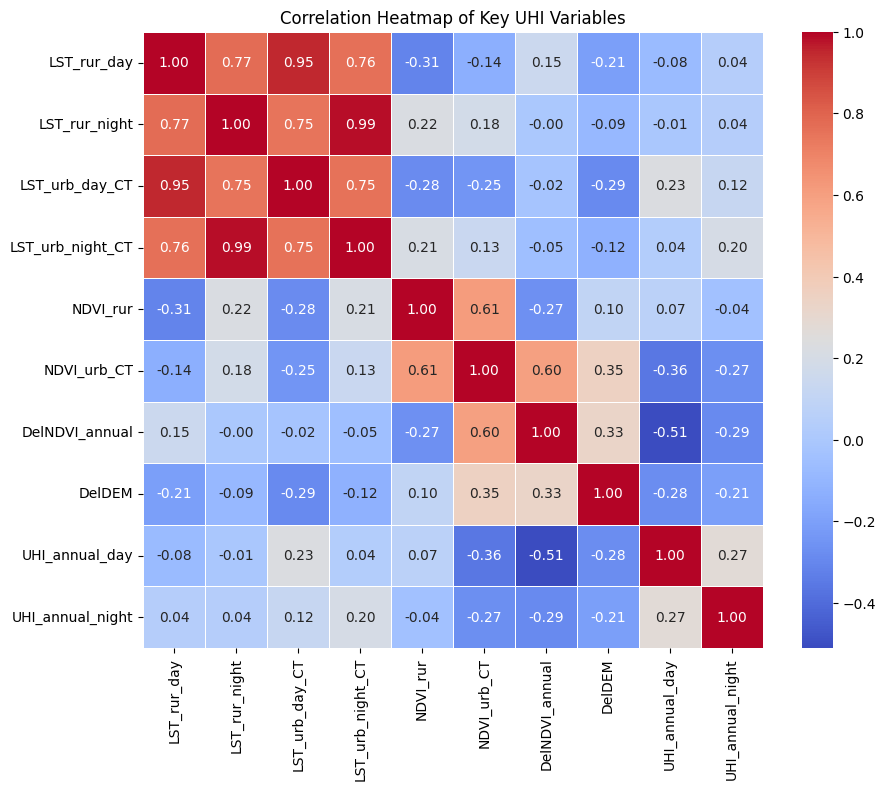

In [290]:


# Select only relevant numeric columns
corr_features = [
    'LST_rur_day', 'LST_rur_night',
    'LST_urb_day_CT', 'LST_urb_night_CT',
    'NDVI_rur', 'NDVI_urb_CT',
    'DelNDVI_annual', 'DelDEM',
    'UHI_annual_day', 'UHI_annual_night'
]

numeric_data = Urban_Heat_Island_data[corr_features]

# Compute correlation
corr_matrix = numeric_data.corr()

# Plot heatmap with annotations
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Key UHI Variables")
plt.show()


## **Scatterplots of UHI vs Key Features**

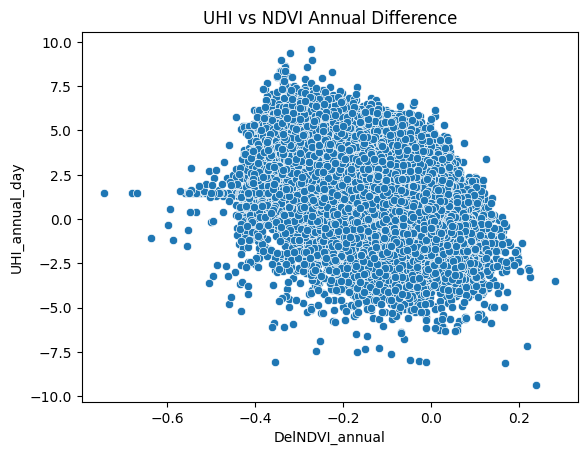

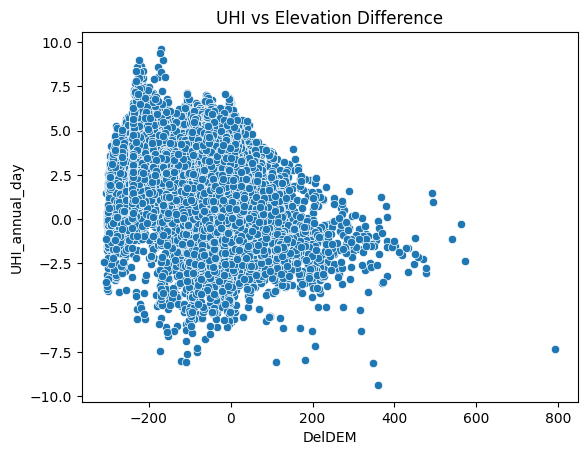

In [291]:

sns.scatterplot(x='DelNDVI_annual', y='UHI_annual_day', data=Urban_Heat_Island_data)
plt.title('UHI vs NDVI Annual Difference')
plt.show()

sns.scatterplot(x='DelDEM', y='UHI_annual_day', data=Urban_Heat_Island_data)
plt.title('UHI vs Elevation Difference')
plt.show()


## **Bar Chart : Average UHI vs Key Features**

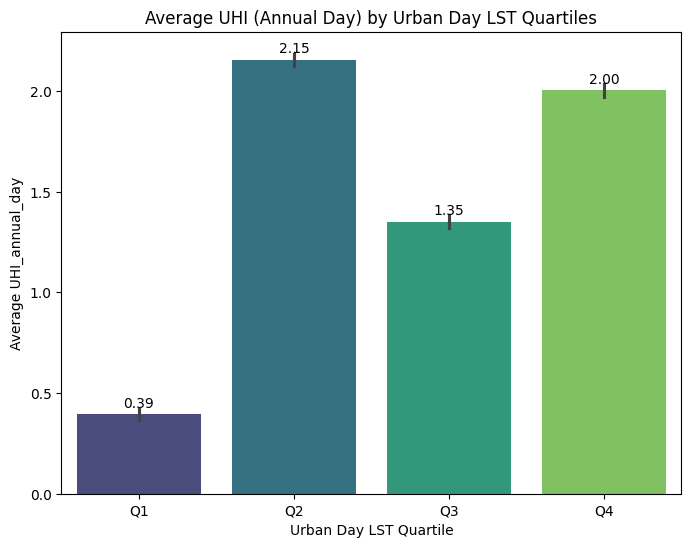

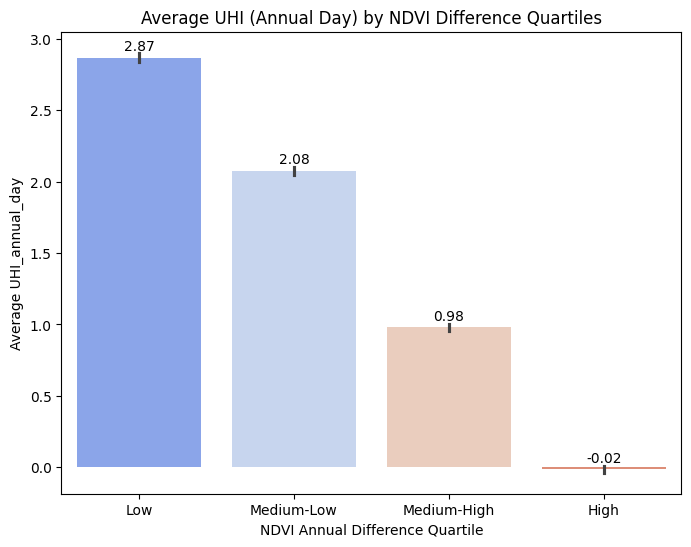

In [292]:

# Average UHI per LST_urb_day_CT quartile
Urban_Heat_Island_data['LST_urb_day_CT_quartile'] = pd.qcut(Urban_Heat_Island_data['LST_urb_day_CT'], 4, labels=['Q1','Q2','Q3','Q4'])
plt.figure(figsize=(8,6))
ax = sns.barplot(x='LST_urb_day_CT_quartile', y='UHI_annual_day', data=Urban_Heat_Island_data, palette='viridis')
plt.title('Average UHI (Annual Day) by Urban Day LST Quartiles')
plt.xlabel('Urban Day LST Quartile')
plt.ylabel('Average UHI_annual_day')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3),
                textcoords='offset points')
plt.show()


# Average UHI per NDVI difference quartile
Urban_Heat_Island_data['DelNDVI_annual_bin'] = pd.qcut(Urban_Heat_Island_data['DelNDVI_annual'], 4, labels=['Low','Medium-Low','Medium-High','High'])
plt.figure(figsize=(8,6))
ax = sns.barplot(x='DelNDVI_annual_bin', y='UHI_annual_day', data=Urban_Heat_Island_data, palette='coolwarm')
plt.title('Average UHI (Annual Day) by NDVI Difference Quartiles')
plt.xlabel('NDVI Annual Difference Quartile')
plt.ylabel('Average UHI_annual_day')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3),
                textcoords='offset points')
plt.show()


# **Data Preprocessing**

## **Feature Selection**

In [293]:

# Target variable
target = 'UHI_annual_day'

# Selected features based on dataset
features = [
    'LST_rur_day', 'LST_rur_night',
    'LST_urb_day_CT', 'LST_urb_night_CT',
    'NDVI_rur', 'NDVI_urb_CT',
    'DelNDVI_annual', 'DelDEM'
]
X = Urban_Heat_Island_data[features]
y = Urban_Heat_Island_data[target]


## **Train/Test Split and Scaling**

In [294]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Linear Regression Model**

In [295]:
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation Metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
evs_lr = explained_variance_score(y_test, y_pred_lr)

# Print all metrics
print(f"Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")
print(f"Explained Variance Score: {evs_lr:.4f}")



--- Linear Regression ---
Linear Regression Metrics:
Mean Absolute Error (MAE): 0.0549
Mean Squared Error (MSE): 0.0742
Root Mean Squared Error (RMSE): 0.2724
R-squared (R2): 0.9799
Explained Variance Score: 0.9799


## **Feature Importance via Coefficients**

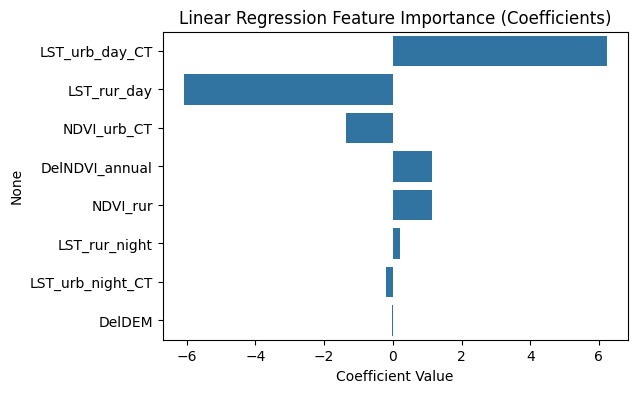

In [296]:


coefficients = pd.Series(lr_model.coef_, index=features).sort_values(key=abs, ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title('Linear Regression Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

## **Actual vs Predicted Plot**

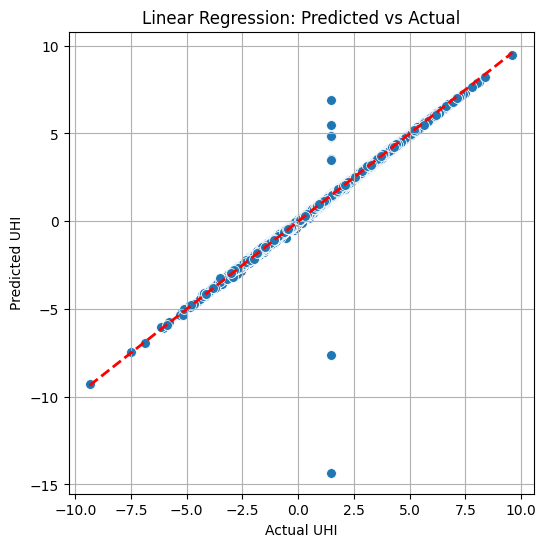

In [297]:
plt.figure(figsize=(6,6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred_lr, s=50)

# 45-degree reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2
)

plt.xlabel('Actual UHI')
plt.ylabel('Predicted UHI')
plt.title('Linear Regression: Predicted vs Actual')

plt.grid(True)
plt.show()


## **Linear Regression Residuals**

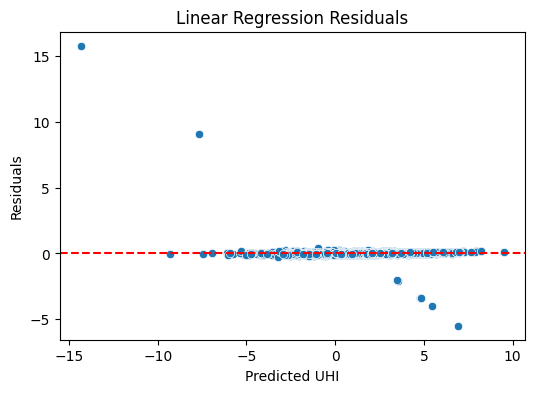

In [298]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted UHI')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')
plt.show()

# **Random Forest Regression**

In [299]:
print("\n--- Random Forest Regression ---")
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
evs_rf = explained_variance_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")
print(f"Explained Variance Score: {evs_rf:.4f}")




--- Random Forest Regression ---
Random Forest Metrics:
Mean Absolute Error (MAE): 0.0656
Mean Squared Error (MSE): 0.0290
Root Mean Squared Error (RMSE): 0.1703
R-squared (R2): 0.9922
Explained Variance Score: 0.9922


## **Feature Importance**

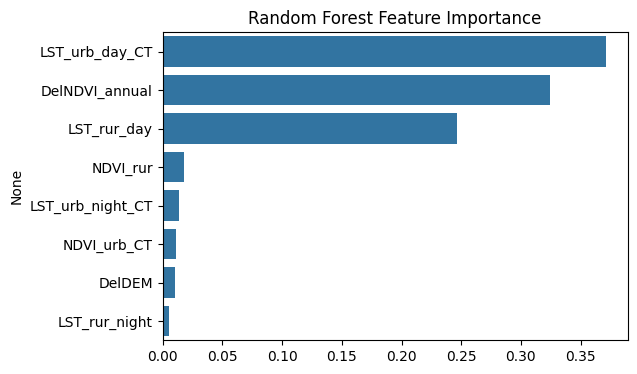

In [300]:

importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Random Forest Feature Importance')
plt.show()

## **Predicted vs Actual**

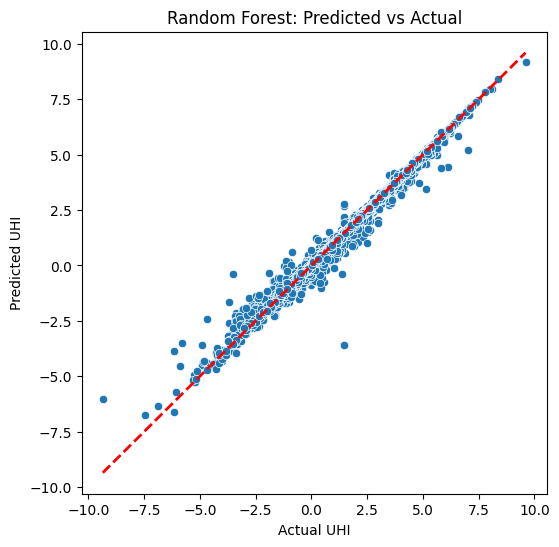

In [301]:

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual UHI')
plt.ylabel('Predicted UHI')
plt.title('Random Forest: Predicted vs Actual')
plt.show()


## **Residuals**

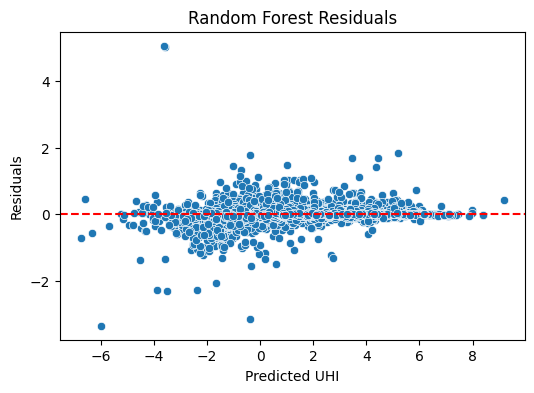

In [302]:

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted UHI')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')
plt.show()

# **Gradient Boosting Regression**

In [303]:


print("\n--- Gradient Boosting Regression ---")
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation Metrics
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
evs_gb = explained_variance_score(y_test, y_pred_gb)

print("Gradient Boosting Metrics:")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"R-squared (R2): {r2_gb:.4f}")
print(f"Explained Variance Score: {evs_gb:.4f}")



--- Gradient Boosting Regression ---
Gradient Boosting Metrics:
Mean Absolute Error (MAE): 0.2507
Mean Squared Error (MSE): 0.1270
Root Mean Squared Error (RMSE): 0.3564
R-squared (R2): 0.9657
Explained Variance Score: 0.9657


## **Feature Importance**

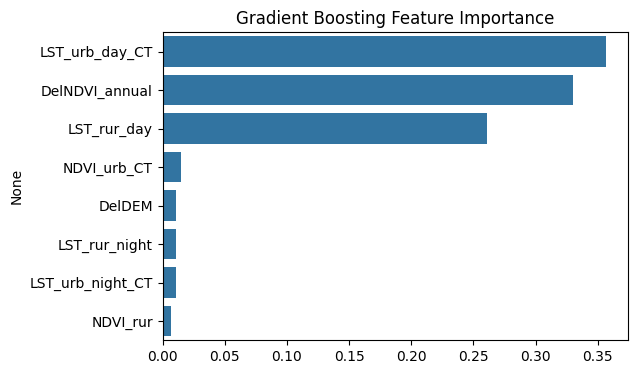

In [304]:

importances_gb = pd.Series(gb_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=importances_gb.values, y=importances_gb.index)
plt.title('Gradient Boosting Feature Importance')
plt.show()

## **Predicted vs Actual**

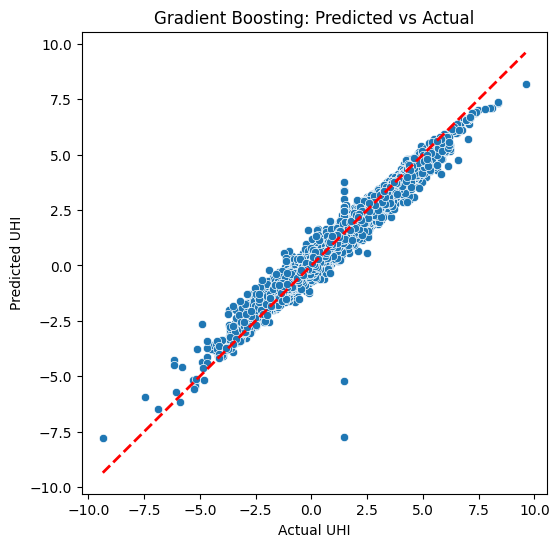

In [305]:

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual UHI')
plt.ylabel('Predicted UHI')
plt.title('Gradient Boosting: Predicted vs Actual')
plt.show()

## **Residuals**

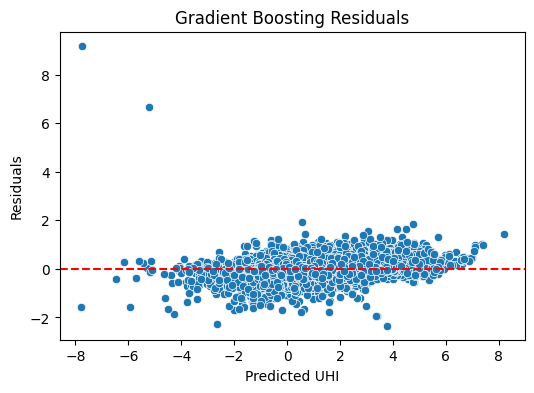

In [306]:

residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_gb, y=residuals_gb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted UHI')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Residuals')
plt.show()

# **Comparison Plot**

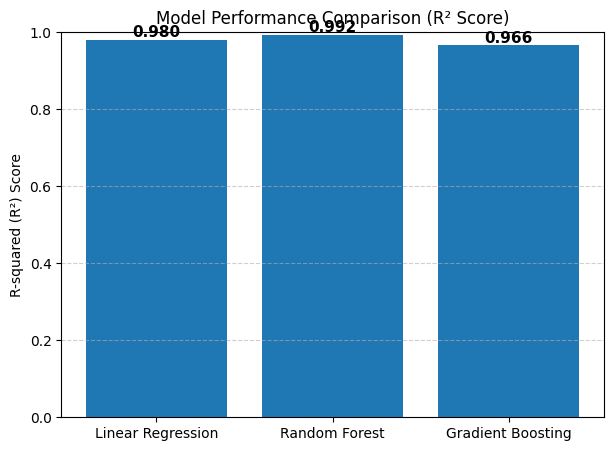

In [307]:

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [r2_lr, r2_rf, r2_gb]

plt.figure(figsize=(7,5))
bars = plt.bar(models, r2_scores)

# Add data labels
for bar, score in zip(bars, r2_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{score:.3f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.ylabel("R-squared (R²) Score")
plt.title("Model Performance Comparison (R² Score)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


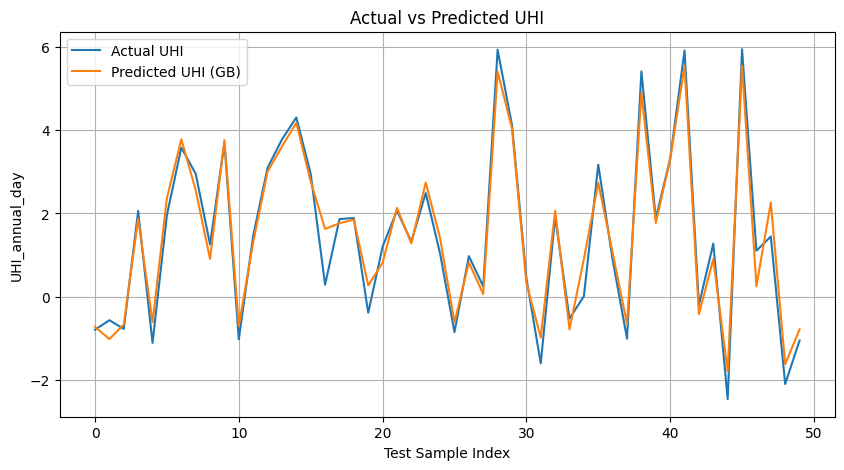

In [308]:
# TESTING: ACTUAL VS PREDICTED LINE PLOT
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual UHI')
plt.plot(y_pred_gb[:50], label='Predicted UHI (GB)')
plt.xlabel("Test Sample Index")
plt.ylabel("UHI_annual_day")
plt.title("Actual vs Predicted UHI")
plt.legend()
plt.grid(True)
plt.show()


In [309]:
test_results = pd.DataFrame({
    'Actual UHI': y_test.values,
    'Predicted UHI (GB)': y_pred_gb
})

test_results.head(10)


,Actual UHI,Predicted UHI (GB)
0,-0.787841,-0.717176
1,-0.560083,-1.013354
2,-0.768865,-0.664124
3,2.061493,1.878709
4,-1.105123,-0.606370
5,1.959796,2.368131
6,3.580886,3.781039
7,2.956474,2.563155
8,1.257495,0.910634
9,3.698864,3.757707
